# Hypothesis Testing
## Startup Survival Analysis in India 

**DOMAIN:**
Startup Ecosystem

**OBJECTIVE:**

The objective of this project is to conduct **Hypothesis Testing** to understand the **financial factors** that differentiate thriving, **currently operating startups from those that ultimately cease operations**.

In particular, to address the critical questions of **whether there is a statistically significant difference in the mean funds raised by startups** that are currently operating compared to those that have ceased operations. Additionally, we aim to investigate **whether there exists a significant disparity in the number of funding rounds** between currently operating startups and startups that have closed.

**DATA:**

The dataset comprises of the information about startups in India.

*- Dataset Credits --> https://www.kaggle.com/datasets/yanmaksi/big-startup-secsees-fail-dataset-from-crunchbase (Filter on country and status column)*

**PLAN OF ACTION:**
1. **Formulating the Hypothesis:** Begin by crafting clear and testable **hypotheses that lay the foundation** for your analysis.

2. **Data Cleaning and Exploration:** Dive into the dataset, conducting a **thorough examination** to ensure its quality and coherence, while also gaining a **deeper understanding of the data.**

3. **Selecting the Appropriate Statistical Test:** Identify the most **suitable statistical tests** or methods that align with your hypotheses and objectives.

4. **Statistical Analysis:** Execute the selected tests or analyses on the dataset, **generating meaningful insights and drawing statistically sound conclusions.**

5. **Conclusion:** Summarize the findings and conclusions drawn from the analysis, **providing actionable insights that address your research objectives effectively.**

**Let's start!**

#### STEP 1 : FORMULATING HYPOTHESIS

**HYPOTHESIS TESTING I:**

***Mean Funds Raised***

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

**HYPOTHESIS TESTING II:**

***Number of Funding Rounds***

Null Hypothesis (H0): There is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

#### STEP 2 : DATA CLEANING AND EXPLORATION

We have formualted the hypothesis successfully. Now, let's explore the dataset and commence our analysis

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [183]:
#Importing the dataset

startup_df = pd.read_excel(r"C:\Users\kzxf368\OneDrive - AZCollaboration\Desktop\Data Science\Python\DUO\Project - Startup & Flight\Funding Dataset.xlsx")

In [187]:
#Exploring the dataset

startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/1000lookz,1000Lookz,http://1000lookz.com,Beauty,-,operating,IND,25,Chennai,Chennai,1,2008-01-01 00:00:00,2013-07-22,2013-07-22
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01 00:00:00,2012-11-15,2012-11-15
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01 00:00:00,2007-11-06,2007-11-06
4,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01 00:00:00,2015-07-06,2015-07-06


In [188]:
startup_df.tail()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1531,/organization/zoutons,Zoutons,http://zoutons.com,E-Commerce|Online Shopping|Sales and Marketing,3300000,operating,IND,7,New Delhi,New Delhi,1,2013-01-01 00:00:00,2013-09-06,2013-09-06
1532,/organization/zumbl,Zumbl,http://zumbl.com,Chat|Entertainment|Interest Graph|Messaging,140000,operating,IND,10,New Delhi,Gurgaon,3,2012-11-01 00:00:00,2013-04-03,2014-04-05
1533,/organization/zupermeal,ZuperMeal,http://www.zupermeal.com,Food Processing,2000000,operating,IND,16,IND - Other,Andheri,1,NaN,2015-10-08,2015-10-08
1534,/organization/zuvvu,Zuvvu,http://zuvvu.com,Advertising|Social Media Advertising|Social Me...,12000,closed,IND,9,Ahmedabad,Ahmadabad,1,2010-06-01 00:00:00,2011-11-01,2011-11-01
1535,/organization/zynergy-projects-services,Zynergy Projects & Services,http://www.zynergygroup.net/,Clean Technology,-,operating,IND,25,Chennai,Chennai,1,NaN,2015-08-19,2015-08-19


In [184]:
startup_df.shape

(1536, 14)

The dataset consists inforamtion on **1536 startups.** Though all 13 columns provides valuable details, we primarily focus on the columns which relate to the **financial aspects of the startups survival.** They are **"Status", "Funding_Total_Usd"** and **"Funding_Rounds".**

Before diving deep into data exploration, we need to **clean the dataset.**

In [185]:
#Drop the duplicates if there are any

startup_df.drop_duplicates().shape

(1536, 14)

In [186]:
# The columns which has to be checked for null values are listed
columns_to_check = ['status', 'funding_total_usd', 'funding_rounds']

# Check for null values in the specified columns
null_counts = startup_df[columns_to_check].isnull().sum()

# Display the null value counts for each column
print(null_counts)

status               0
funding_total_usd    0
funding_rounds       0
dtype: int64


In [189]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          1536 non-null   object        
 1   name               1536 non-null   object        
 2   homepage_url       1510 non-null   object        
 3   category_list      1493 non-null   object        
 4   funding_total_usd  1536 non-null   object        
 5   status             1536 non-null   object        
 6   country_code       1536 non-null   object        
 7   state_code         1520 non-null   float64       
 8   region             1516 non-null   object        
 9   city               1516 non-null   object        
 10  funding_rounds     1536 non-null   int64         
 11  founded_at         1255 non-null   object        
 12  first_funding_at   1536 non-null   datetime64[ns]
 13  last_funding_at    1536 non-null   datetime64[ns]
dtypes: datet

There are **no null or duplicate values** in the dataset. But we could see that data in the **total_funding_rounds** column should be **cleaned and the datatype should be formatted** for proper analysis.

In [196]:
#Dropping the columns without proper data and resetting the index values

startup_df = startup_df[startup_df['funding_total_usd']!='-']
startup_df.reset_index(drop = True)

startup_df.shape

(1134, 14)

In [211]:
#Formatting the dataset to float datatype

startup_df['funding_total_usd'] = pd.to_numeric(startup_df['funding_total_usd'], errors='coerce')
startup_df['funding_total_usd'] = startup_df['funding_total_usd'].astype('float')

In [212]:
startup_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1134 entries, 0 to 1534
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   permalink          1134 non-null   object        
 1   name               1134 non-null   object        
 2   homepage_url       1113 non-null   object        
 3   category_list      1115 non-null   object        
 4   funding_total_usd  1134 non-null   float64       
 5   status             1134 non-null   object        
 6   country_code       1134 non-null   object        
 7   state_code         1125 non-null   float64       
 8   region             1122 non-null   object        
 9   city               1122 non-null   object        
 10  funding_rounds     1134 non-null   int64         
 11  founded_at         940 non-null    object        
 12  first_funding_at   1134 non-null   datetime64[ns]
 13  last_funding_at    1134 non-null   datetime64[ns]
dtypes: datetime64

Let's do **Exploratory Data Anlysis** in the cleaned dataset.

At first the "Status" column.

In [208]:
status_counts = startup_df['status'].value_counts()
status_counts

# status_counts --> Series datatype
# The status_counts.index consists of "operating" and "closed"
# The status_counts.values consists of "1085" and "49"

status
operating    1085
closed         49
Name: count, dtype: int64

In [206]:
enumerate(status_counts)

#enumerate function takes as input, an iterable and adds a counter to each iterable element, and returns an 
#enumerate object. The counter can also act as indices to each element which can be used to reference these 
#elements at a later stage when required. 

print(list(enumerate(status_counts)))

[(0, 1085), (1, 49)]


In [198]:
status_counts.isnull()

status
operating    False
closed       False
Name: count, dtype: bool

There are no null values

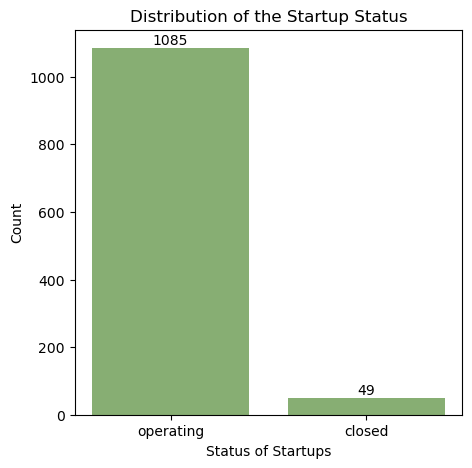

In [251]:
#Visualize the status column

#Plotting
plt.figure(figsize=(5,5))

plt.bar(status_counts.index,status_counts.values,color='#87ae73')
plt.xlabel("Status of Startups")
plt.ylabel("Count")
plt.title("Distribution of the Startup Status")

# Sage green colour as "#87ae73"
# The X and Y atttributes are taken from the status_counts series

#Adding labels to the bars
for x,y in status_counts.items():
    plt.text(x,y+10,y,ha='center')
    
# x: This is the x-coordinate where the data label will be placed.
# y + 10: This is the y-coordinate where the data label will be placed
# y: the y-coordinate to be plotted
# ha='center': This parameter specifies the horizontal alignment of the text, ensuring that it's centered above each bar.

#Display the bar graph
plt.show()

We have successfully visualized the "Status" column. Now, let's move to the funding column

In [213]:
# Let us understand more about funding column

# Set the display format for float numbers to display complete numbers
pd.options.display.float_format = '{:.0f}'.format

# By setting pd.options.display.float_format to ' {:.0f}'.format, you instruct pandas to format floating-point numbers with 
# zero decimal places, effectively displaying complete numbers.

# Assuming startup_df is your DataFrame
description = startup_df['funding_total_usd'].describe()

# Display the description with complete numbers
print(description)

count         1134
mean      23391193
std      153640842
min            569
25%         200000
50%        1275000
75%       10000000
max     3151140000
Name: funding_total_usd, dtype: float64


Let's find out the startups with the **highest and least fundings.**

In [214]:
startup_df[startup_df['funding_total_usd']==3151140000]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
434,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01 00:00:00,2009-01-01,2015-07-28


In [97]:
startup_df[startup_df['funding_total_usd']==569]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
834,/organization/ruralserver,RuralServer,http://www.ruralserver.com,Cloud Computing|Cloud Data Services|Domains|In...,569,operating,IND,36,New Delhi,Noida,1,2010-01-01 00:00:00,2013-10-17,2013-10-17


**Highest funding:** Flipkart

**Lowest funding:** RuralServer	

The highest funding amount is attributed to Flipkart, a notable leader in the industry, aligning with its substantial financial requirements and prominence.
Though **Rural Server** is the startup with the **least funding, it is successfully operating.** 

Let's explore the "Funding_Rounds" column.

In [215]:
funding_rounds_count = startup_df['funding_rounds'].value_counts().sort_index()
funding_rounds_count

funding_rounds
1     795
2     205
3      88
4      27
5       9
6       5
7       2
8       1
11      1
12      1
Name: count, dtype: int64

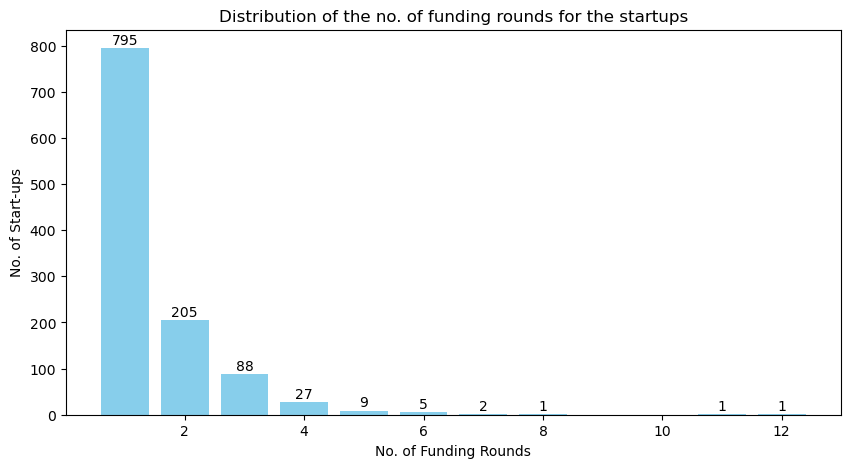

In [219]:
#Let's visualize

plt.figure(figsize=(10,5))
plt.bar(funding_rounds_count.index,funding_rounds_count.values,color = 'skyblue')
plt.xlabel('No. of Funding Rounds')
plt.ylabel('No. of Start-ups')
plt.title('Distribution of the no. of funding rounds for the startups')

for x,y in funding_rounds_count.items():
    plt.text(x,y+8,y,ha='center')

plt.show()

Remarkably, the majority of startups in our dataset, precisely 795 of them, have undergone just one round of funding. In stark contrast, only two startups have secured more than eight rounds of funding. Now, let's delve into **identifying these exceptional outliers within the dataset.**

While running the **hypothesis test we can create 3 categories for no. of funding rounds ~ 1, 2, 3+.**

In [223]:
startup_df[startup_df['funding_rounds']==11] 

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1210,/organization/snapdeal,Snapdeal,http://www.snapdeal.com,E-Commerce,1897699998,operating,IND,7,New Delhi,New Delhi,11,2010-01-01 00:00:00,2011-01-01,2015-08-18


In [221]:
startup_df[startup_df['funding_rounds']==12]

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
434,/organization/flipkart,Flipkart,http://www.flipkart.com,E-Commerce|Online Shopping,3151140000,operating,IND,19,Bangalore,Bangalore,12,2007-09-01 00:00:00,2009-01-01,2015-07-28


Flipkart and Snapdeal have the highest number of funding rounds.

Now that we've gained a comprehensive understanding of the dataset, let's proceed to test our hypothesis.

#### STEP 4 : SELECTING THE APPROPRIATE STATISTICAL TEST

#### HYPOTHESIS TESTING I : MEAN FUNDS RAISED

Null Hypothesis (H0): There is no statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the mean funds raised by currently operating startups and startups that have closed.

Using an **independent sample t-test** in this context is justified for the following reasons:
1. **Comparing Two Independent Groups:** The independent sample t-test is suitable when we are comparing two separate and independent groups, which aligns perfectly with our scenario of **comparing currently operating startups with startups that have closed. These two groups are distinct and unrelated in terms of their current status.**

2. **Continuous Numeric Data:** The t-test is designed for **comparing means of continuous numerical data,** which is precisely what we have in our hypothesis testing. We are interested in comparing the mean funds raised, a continuous variable, between the two groups.

3. **Normal Distribution Assumption:** The t-test assumes that the **data within each group follows a normal distribution.** While this assumption should be checked, it **often holds reasonably well for financial data, especially when the sample size is sufficiently large ~ we know basis EDA that both have >30 sample size.**

4. **Homogeneity of Variance:** We must check that using **Levene Test.**

#### LEVENE'S TEST

The Levene's Test is a statistical test used to **assess whether the variances of two or more groups are equal or homogenous.** It is particularly valuable when comparing multiple groups with the same independent variable to ensure that the assumption of homogeneity of variances, a key assumption in many statistical tests, is met.

**Null Hypothesis (H0):** The null hypothesis in Levene's Test is that there are no significant differences in the variances of the groups being compared. In other words, it assumes that the variances are equal across all groups.

**Alternative Hypothesis (H1):** The alternative hypothesis in Levene's Test is that there are significant differences in the variances of the groups being compared. If the p-value is sufficiently small, you would reject the null hypothesis in favor of the alternative, indicating that at least one group has a significantly different variance compared to the others.

**In practical terms, Levene's Test helps you determine whether it's appropriate to use statistical tests that assume equal variances across groups, such as the independent sample t-test or analysis of variance (ANOVA). If the test indicates unequal variances, you may need to consider alternative statistical methods that are more robust to heteroscedasticity (unequal variances).**

Overall, Levene's Test is a valuable tool in the field of statistics for assessing the homogeneity of variances and ensuring the validity of subsequent statistical analyses.

In [224]:
#Levene's test
from scipy import stats

group1 = startup_df[startup_df['status'] == 'operating']['funding_total_usd']
group2 = startup_df[startup_df['status'] == 'closed']['funding_total_usd']

stat, p_value = stats.levene(group1, group2)
print(f"Levene's Test Statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: Variances are not equal.")
else:
    print("Fail to reject the null hypothesis: Variances are equal.")

Levene's Test Statistic: 0.36074537025282777
P-value: 0.5482127964683872
Fail to reject the null hypothesis: Variances are equal.


We have determined that the **variances are equal,** thus meeting the assumption for the **independent sample t-test.** We can now proceed with the independent sample t-test for equal variances confidently."

#### HYPOTHESIS TESTING II : NUMBER OF FUNDING ROUNDS

Null Hypothesis (H0): There is no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

Alternative Hypothesis (H1): There is a statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed.

The **Chi-Square Test of Independence** is typically used when you have **categorical data and you want to investigate whether there is a statistically significant association or relationship between two categorical variables.**

In our case, you are interested in the **number of funding rounds (which is likely a discrete, count variable) and the status of startups (which is categorical - either "currently operating" or "closed").**

Here's why the **Chi-Square Test of Independence is suitable for our hypothesis.**

We know that observations are independent, Cells in the **contingency table are mutually exclusive,** The only thing we need to check is if **~ Expected value of cells should be 5 or greater in at least 80% of cells.**

#### HYPOTHESIS TESTING I (MEAN FUNDS RAISED) :
     Independent Sample T-Test for Equal Variances.

#### HYPOTHESIS TESTING II (NUMBER OF FUNDING ROUNDS) :  
     Chi-Square Test of Independence.

#### STATISTICAL ANALYSIS

#### HYPOTHESIS TESTING I (MEAN FUNDS RAISED) :
     Independent Sample T-Test for Equal Variances.

In [226]:
#No. of startups which are operating
startup_df[startup_df['status']=='operating']['funding_total_usd'].count()

1085

In [225]:
#No. of startups which are closed
startup_df[startup_df['status']=='closed']['funding_total_usd'].count()

49

In [232]:
#Creating a new dataframe using loc() for the startups which are operating and their respective funds.

df1 = startup_df.loc[startup_df['status']=='operating',['funding_total_usd']].reset_index(drop=True)
df1 = df1.rename(columns={'funding_total_usd':'Funds_operating'})
df1.head()

,Funds_operating
0,10000000
1,6369507
2,4000000
3,20000
4,2065000


In [231]:
#Creating a new dataframe using loc() for the startups which are closed and their respective funds.

df2 = startup_df.loc[startup_df['status']=='closed',['funding_total_usd']].reset_index(drop=True)
df2 = df2.rename(columns={'funding_total_usd':'Funds_closed'})
df2.head()

,Funds_closed
0,25000
1,10000
2,10000000
3,40000
4,25000000


In [233]:
#Combining the two dataframes for further hypothesis testing

df3 = pd.concat([df1, df2], axis = 1)
df3.head()

,Funds_operating,Funds_closed
0,10000000,25000
1,6369507,10000
2,4000000,10000000
3,20000,40000
4,2065000,25000000


In [239]:
# Funds_operating represents funds for operating startup
#Calculating the mean for the operating startups

mean_1 = df3['Funds_operating'].mean()
mean_1

23981373.343251728

In [240]:
# Funds_closed represents funds for closed startup
#Calculating the mean for the operating startups

mean_2 = df3['Funds_closed'].mean()
mean_2

10322911.346938776

In [241]:
print('Mean funds (in million) for startup which are operating is:',mean_1)
print('Mean funds (in million) for startup which are closed is:',mean_2)

Mean funds (in million) for startup which are operating is: 23981373.343251728
Mean funds (in million) for startup which are closed is: 10322911.346938776


**Null Hypothesis:**

H0= There is **no significant difference between the mean funds raised by the two groups** i.e. startups which are operating & startups which are closed

**i.e. H0: mean_1 = mean_2**

**Alternative hypothesis:**

H1 = there is **significant difference between the mean funds raised by the two groups** i.e. startups which are operating & startups which are closed

**i.e. H1: mean_1 != mean_2**

Also our **alpha is 0.05.**

In [ ]:
#load library

from scipy.stats import ttest_ind

In [243]:
# Hypothesis Testing I : MEAN FUNDS RAISED 
# Independent T-Test with Equal Variances

t, pvalue = ttest_ind(df3['Funds_operating'], df3['Funds_closed'], nan_policy = 'omit')

# Print results
print('T-statistic:', t)
print('P-value:', pvalue)

T-statistic: 0.6085283061630911
P-value: 0.5429592211146083


The **p-value, which is greater than the chosen alpha level (i.e., 0.54 > 0.05),** leads us to **fail to reject the null hypothesis with 95% confidence.** 

Therefore, we conclude that there is **no statistically significant difference in the funds raised between currently operating startups and closed startups.**

#### HYPOTHESIS TESTING II (NUMBER OF FUNDING ROUNDS) :  
     Chi-Square Test of Independence.

In [244]:
# Define a function to categorize funding rounds
def categorize_rounds(round):
    if round == 1:
        return '1'
    elif round == 2:
        return '2'
    else:
        return '3+'

# Apply the categorize_rounds function to create a new 'category' column
startup_df['rounds of funding category'] = startup_df['funding_rounds'].apply(categorize_rounds)

# Print the DataFrame with the new category column
startup_df.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at,rounds of funding category
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05,1
2,/organization/21diamonds-india,21Diamonds,http://www.21diamonds.de,E-Commerce,6369507,operating,IND,10,New Delhi,Gurgaon,1,2012-06-01 00:00:00,2012-11-15,2012-11-15,1
3,/organization/247-learning-private,24x7 Learning,http://www.24x7learning.com,EdTech|Education|Systems,4000000,operating,IND,19,Bangalore,Bangalore,1,2001-01-01 00:00:00,2007-11-06,2007-11-06,1
4,/organization/33coupons,33Coupons,http://33coupons.in,Internet,20000,operating,IND,36,Kanpur,Kanpur,1,2015-05-01 00:00:00,2015-07-06,2015-07-06,1
5,/organization/3dsoc,3DSoC,http://www.3dsoc.com,3D|Mobile,2065000,operating,IND,19,Bangalore,Bangalore,2,2006-06-01 00:00:00,2007-12-01,2010-08-01,2


In [245]:
# Create cross tab
pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

status,closed,operating
rounds of funding category,,
1,39,756
2,7,198
3+,3,131


In [249]:
import scipy
contingency_table = pd.crosstab(startup_df['rounds of funding category'], startup_df['status'])

# Calculate expected frequencies
expected_frequencies = scipy.stats.contingency.expected_freq(contingency_table)

# Create a DataFrame to display the expected frequencies
expected_df = pd.DataFrame(expected_frequencies, columns=contingency_table.columns, index=contingency_table.index)

# Display the expected frequencies
print("Expected Frequencies:")
print(expected_df)

Expected Frequencies:
status                      closed  operating
rounds of funding category                   
1                               34        761
2                                9        196
3+                               6        128


**Alpha is 0.05.**

In [250]:
# Import library
from scipy.stats import chi2_contingency

# Run the Chi Square Test

chi2, pval, dof, exp_freq = chi2_contingency(contingency_table, correction = False)
print('The p-value is',pval)

The p-value is 0.2908506204110049


The **p-value, which is greater than the chosen alpha level (i.e., 0.29 > 0.05),** leads us to **fail to reject the null hypothesis with 95% confidence.**

This suggests that there is **no statistically significant difference in the number of funding rounds between currently operating startups and startups that have closed,** based on our dataset and chosen level of significance.

#### STEP 5 : CONCLUSION:

#### HYPOTHESIS TESTING I (MEAN FUNDS RAISED) :
     Independent Sample T-Test for Equal Variances.
     
**RESULT:**

The **p-value, which is greater than the chosen alpha level (i.e., 0.54 > 0.05),** leads us to **fail to reject the null hypothesis with 95% confidence.** 

There is **no statistically significant difference in the funds raised by currently operating startups and startups that have     closed,** as per the independent sample t-test.

#### HYPOTHESIS TESTING II (NUMBER OF FUNDING ROUNDS) :  
     Chi-Square Test of Independence.
     
**RESULT:**

The **p-value, which is greater than the chosen alpha level (i.e., 0.29 > 0.05),** leads us to **fail to reject the null hypothesis with 95% confidence.**

There is **no statistically significant association between the number of funding rounds and the status of startups,** as           indicated by the Chi-Square Test of Independence.

## THANK YOU !!